In [23]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [24]:
(train_x,train_y),(test_x,test_y)= keras.datasets.fashion_mnist.load_data()

print(train_x[:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [25]:
train_x.shape

(60000, 28, 28)

In [26]:
# 3차원 데이터 변환
train_scaled = train_x.reshape(-1,28,28,1)/255.0
test_scaled = test_x.reshape(-1,28,28,1)/255.0
train_scaled.shape
test_scaled.shape

(10000, 28, 28, 1)

In [27]:
sub_x,val_x,sub_y,val_y= train_test_split(train_scaled,train_y,random_state=42)
sub_x.shape,val_x.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

In [28]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))


In [29]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [30]:
from tensorflow.keras.utils import plot_model
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [35]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
check_cb = keras.callbacks.ModelCheckpoint('best-cnn.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)


In [37]:
history = model.fit(sub_x,sub_y,epochs=10,batch_size=64,\
    validation_data=(val_x,val_y),callbacks=[check_cb,early_cb])

Epoch 1/10


2022-07-19 16:56:15.922943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


704/704 [==============================] - ETA: 0s - loss: 0.9382 - accuracy: 0.6824

2022-07-19 16:56:27.370019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


704/704 [==============================] - 13s 17ms/step - loss: 0.9382 - accuracy: 0.6824 - val_loss: 0.5644 - val_accuracy: 0.7951
Epoch 2/10
704/704 [==============================] - 13s 18ms/step - loss: 0.5694 - accuracy: 0.7971 - val_loss: 0.4514 - val_accuracy: 0.8410
Epoch 3/10
704/704 [==============================] - 11s 16ms/step - loss: 0.4885 - accuracy: 0.8268 - val_loss: 0.4082 - val_accuracy: 0.8582
Epoch 4/10
704/704 [==============================] - 11s 16ms/step - loss: 0.4438 - accuracy: 0.8442 - val_loss: 0.4253 - val_accuracy: 0.8449
Epoch 5/10
704/704 [==============================] - 11s 16ms/step - loss: 0.4141 - accuracy: 0.8538 - val_loss: 0.4065 - val_accuracy: 0.8479
Epoch 6/10
704/704 [==============================] - 11s 16ms/step - loss: 0.3920 - accuracy: 0.8639 - val_loss: 0.3533 - val_accuracy: 0.8745
Epoch 7/10
704/704 [==============================] - 11s 16ms/step - loss: 0.3780 - accuracy: 0.8665 - val_loss: 0.3393 - val_accuracy: 0.8785
Epo

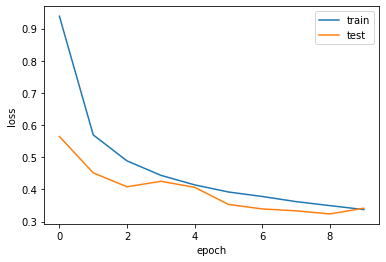

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [39]:
# 정확도
score = model.evaluate(val_x,val_y)
print("loss, accuracy : ",score)


469/469 [==============================] - 3s 5ms/step - loss: 0.3415 - accuracy: 0.8747
loss, accuracy :  [0.341500461101532, 0.8747333288192749]


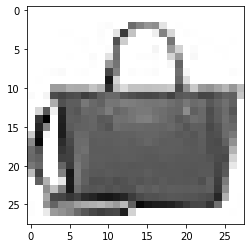

In [40]:
plt.imshow(val_x[0].reshape(28,28),cmap='gray_r')


In [42]:
# 예측
results = model.predict(val_x[0:1])
print(results)

1/1 [==============================] - 0s 16ms/step
[[4.0839485e-08 5.5347332e-10 3.5517812e-06 1.4498542e-07 5.2592236e-07
  1.4672356e-06 1.4181361e-06 1.0231043e-06 9.9999189e-01 2.8050264e-08]]


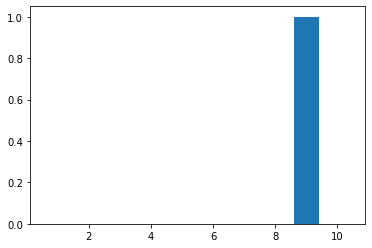

In [43]:
plt.bar(range(1,11),results[0])
plt.show()

In [44]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [46]:
classes[np.argmax(results)]

'가방'

In [47]:
model.layers